In [271]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Reading our csv file
Reading our data in the csv file and outputting the first 5 records to see and gauge on how our data is structured.

In [263]:
df = pd.read_csv("hydrocarbons.csv") # Loading our data
df.head(5)
# print(df["Flash point"])

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1


# Creating dataset
In this section we are creating a new dataset that will have Atomic weight and Aromatic Rings. We will get the Atomic Weight and Aromatic Rings through the smiles that we have in our hydrocarbons Dataframe (df). We will loop through the smiles in our Dataframe so that we can convert every smile to a molecule, of which this will enable us to get the molecular weight and aromatic rings of a given molecule through the use of Descriptors, then append them to their respective arrays that we declared initially. After getting the Atomic_Weight and Aromatic_Rings of every molecule, we are going to create a new columns that will contain both of these respectively.

In [276]:
#Creating a new dataset
smiles = np.asarray(df["smiles"])
smiles
len(smiles)
molecular_weight = [] #Declaring an empty array for storing our molecular weight
aromatic_rings_list = [] #Declaring an empty array for storing aromatic rings

for x in range(len(smiles)):
    # print(smiles[x])
    molecules = Chem.MolFromSmiles(smiles[x]) #Converting smile in position x to a molecule
    
    mol_weight = Chem.Descriptors.MolWt(molecules) #Getting the atomic weight of a smile
    aromatic_rings = Descriptors.NumAromaticRings(molecules) #Getting the number of aromatic rings of a molecule
    
    molecular_weight.append(mol_weight)
    aromatic_rings_list.append(aromatic_rings)
    # print(aromatic_rings)
    # print(mol_weight)
    # print(aromatic_rings)

# print(molecular_weight)
# print(aromagtic_rings_list)

df["Atomic_Weight"] = molecular_weight #Creating a new column in our existing dataset called Atomic Weight that will store atomic weights
df["Aromatic_Rings"] = aromatic_rings_list #Creating a new column in our existing dataset called Aromatic_Rings that will store the number of aromatic rings
df = df[df.notna().all(axis=1)] #Taking all the rows that do not have null values
df.head(5)

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles,Atomic_Weight,Aromatic_Rings
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.234,3
11,N-alkane,Methane,-183.0,-162.0,-,-135,595,297,C,16.043,0
12,N-alkane,Ethane,-183.0,-89.0,-,-135,515,6324,CC,30.070,0
13,N-alkane,Propane,-188.0,-42.0,0.498,-104,470,6334,CCC,44.097,0
14,N-alkane,N-butane,-138.0,-1.0,0.577,-60,365,7843,CCCC,58.124,0


In [278]:
#Lets check how many nulls do we have in our attributes from the hydrocarbons dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 185
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class of hydrocarbon  54 non-null     object 
 1   IUPAC name            54 non-null     object 
 2   Melting point         54 non-null     float64
 3   Boiling point         54 non-null     float64
 4   Density               54 non-null     object 
 5   Flash point           54 non-null     object 
 6   Autoignition temp     54 non-null     object 
 7   pubchem_id            54 non-null     int64  
 8   smiles                54 non-null     object 
 9   Atomic_Weight         54 non-null     float64
 10  Aromatic_Rings        54 non-null     int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 5.1+ KB


# Features and outputs declaration
Based on the null values infomation of this data above, we can see that we have about 54 non-null rows that do not have any null values, meaning that this is the data that we are going to work with.

As stated in the question, our features should be Atomic Weight and Aromatic Rings, this is the reason why we are dropping every column except Atomic Weight and Aromatic Rings when declaring our features.

We have 2 target values below as our we have 2 targets (Melting point and Boiling Point).

We further split the dataset into training and testing below.


In [254]:
X = df.drop(["Class of hydrocarbon","Melting point", "Boiling point","IUPAC name", "Flash point", "Autoignition temp","pubchem_id", "smiles","Density"],axis=1)
y_melting_point = df[["Melting point"]]
y_boiling_point = df[["Boiling point"]]

print(y_melting_point)
print()
print(X)

#Splitting the dataset
X_train, X_test, y_train_melting, y_test_melting = train_test_split(X, y_melting_point, test_size= 0.2, random_state = 42)
X_train, X_test, y_train_boiling, y_test_boiling = train_test_split(X, y_boiling_point, test_size= 0.2, random_state = 42)


print("Training shape : ",X_train.shape, X_test.shape)
print("Melting shapes : ",y_train_melting.shape, y_test_melting.shape)
print("Boiling shapes : ",y_train_boiling.shape, y_test_boiling.shape)

# print("Y data types",y.dtypes)
# print("X data types",X.dtypes)


     Melting point
1             99.0
11          -183.0
12          -183.0
13          -188.0
14          -138.0
15          -130.0
16           -95.0
17           -91.0
18           -57.0
19           -53.0
20           -30.0
21           -26.0
22           -10.0
50            80.0
51           -31.0
59            35.0
71          -135.0
72          -104.0
77           -94.0
78             7.0
80            15.0
83          -142.0
93          -127.0
95           -95.0
96           -75.0
107            6.0
108          -95.0
110          -24.0
111          -48.0
112           13.0
113         -100.0
114          -88.0
128         -118.0
129         -119.0
130         -121.0
135         -140.0
137         -136.0
143         -160.0
144         -160.0
145         -154.0
146         -118.0
155          -17.0
156         -100.0
157         -123.0
164         -132.0
165          -81.0
176         -185.0
177         -185.0
178         -165.0
179         -140.0
180         -119.0
181         

# Melting Point
The model we are selecting is the linear regression as we are dealing with continous targets.

In [283]:
lm = linear_model.LinearRegression() #Defining our model
lm.fit(X_train, y_train_melting) #Training our model for melting points
y_melting_pred = lm.predict(X_test) #Predicting the melting point values using our trained data model
print(y_melting_pred)

[[-115.02621466]
 [-115.02621466]
 [-128.86239852]
 [ -30.0205361 ]
 [-117.01479003]
 [-126.87382316]
 [-117.01479003]
 [ -59.6814792 ]
 [-154.54619089]
 [-113.03763929]
 [   5.05754922]]


## Melting Point evaluation
Based on the results below, the prediction equation is given as : y = 0.98639651(Atomic_Weight) + 38.33524031(Aromatic_Ring) - 198.04331785. 

And we can see that the feature with the most importance is Aromatic Ring.

In [248]:
#Model Evaluation for y_melting
print("Coefficients                      \t:",lm.coef_)
print("Intercepts                        \t:",lm.intercept_)
print("Mean squared error                \t:",mean_squared_error(y_test_melting,y_melting_pred).round(3))
print("Root mean squared error (RMSE)    \t:",np.sqrt(mean_squared_error(y_test_melting,y_melting_pred)).round(3))
print("Coefficient of determination (R^2)\t:",r2_score(y_test_melting,y_melting_pred).round(3))

Coefficients                      	: [[ 0.98639651 38.33524031]]
Intercepts                        	: [-198.04331785]
Mean squared error                	: 2220.421
Root mean squared error (RMSE)    	: 47.121
Coefficient of determination (R^2)	: 0.637


## Visualising the evaluation : Melting Point
Based on the scatter plot below we can see that the lower the values are, the smaller the error is towards our regression line in comparison to when the values are bigger. Our model performs well as we see a clutter of values in the bottom of our regression line.

    Melting Point  Predicted Melting Point
0             7.0              -115.026215
1          -140.0              -115.026215
2          -165.0              -128.862399
3           -10.0               -30.020536
4          -132.0              -117.014790
5          -130.0              -126.873823
6          -104.0              -117.014790
7           -66.0               -59.681479
8          -188.0              -154.546191
9          -118.0              -113.037639
10           80.0                 5.057549


<Axes: xlabel='Melting Point', ylabel='Predicted Melting Point'>

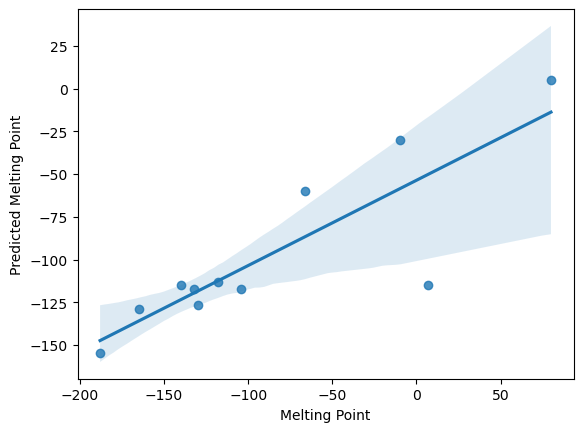

In [250]:
y_test_melting_conv = np.array(y_test_melting).ravel()
y_melting_pred_conv = np.array(y_melting_pred).ravel()
scatter_data = pd.DataFrame({"Melting Point": y_test_melting_conv, "Predicted Melting Point": y_melting_pred_conv})
print(scatter_data.head(20))
sns.regplot(x="Melting Point", y="Predicted Melting Point", data=scatter_data)


# Boiling Point
We are also using the linear regression for the Boiling point as well as our targets are still continous.

In [265]:
lm.fit(X_train, y_train_boiling) #Training our model for boiling points
y_boiling_pred = lm.predict(X_test) #Predicting the boiling point values using our trained data model
print(y_boiling_pred)

[[ 54.55700899]
 [ 54.55700899]
 [ 22.64740998]
 [250.60074061]
 [ 49.97087142]
 [ 27.23354754]
 [ 49.97087142]
 [182.19540503]
 [-36.58565048]
 [ 59.14314655]
 [208.48249933]]


## Boiling Point Evaluation
The prediction equation for our model is : y = 2.27486982(Atomic_Weight) + 26.90195984(Aromatic_Ring) - 136.90058508 as per the evaluation results below.

The feature with the most importance is Aromatic Ring as well.

In [267]:
print("Coefficients                      \t:",lm.coef_)
print("Intercepts                        \t:",lm.intercept_)
print("Mean squared error                \t:",mean_squared_error(y_test_boiling,y_boiling_pred).round(3))
print("Root mean squared error (RMSE)    \t:",np.sqrt(mean_squared_error(y_test_boiling,y_boiling_pred)).round(3))
print("Coefficient of determination (R^2)\t:",r2_score(y_test_boiling,y_boiling_pred).round(3))

Coefficients                      	: [[ 2.27486982 26.90195984]]
Intercepts                        	: [-136.90058508]
Mean squared error                	: 353.49
Root mean squared error (RMSE)    	: 18.801
Coefficient of determination (R^2)	: 0.94


## Visualising the evaluation : Boiling Point
The scatter plot below shows that the boiling points between 30 - 100 are the most accurate when they are predicted by our model.

    Boiling Point  Predicted Boiling Point
0            81.0                54.557009
1            64.0                54.557009
2            30.0                22.647410
3           216.0               250.600741
4            71.0                49.970871
5            36.0                27.233548
6            83.0                49.970871
7           172.0               182.195405
8           -42.0               -36.585650
9            63.0                59.143147
10          218.0               208.482499


<Axes: xlabel='Boiling Point', ylabel='Predicted Boiling Point'>

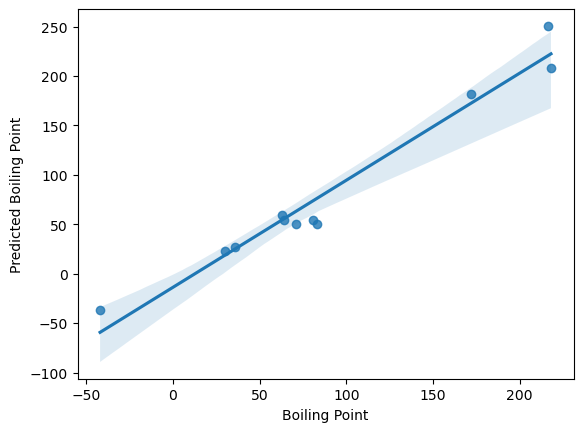

In [269]:
y_test_boiling_conv = np.array(y_test_boiling).ravel()
y_boiling_pred_conv = np.array(y_boiling_pred).ravel()
scatter_data = pd.DataFrame({"Boiling Point": y_test_boiling_conv, "Predicted Boiling Point": y_boiling_pred_conv})
print(scatter_data.head(20))
sns.regplot(x="Boiling Point", y="Predicted Boiling Point", data=scatter_data)


# Challenges 
i) Not knowing what to do with the NaN values as the data contained a lot of these NaN values.

ii) Initially I wanted to combine the targets as one target but I was not sure how to do that hence I opted to use separate targets.

# Potential Improvments
i) I think it is possible to combine both the targets into one rather than having two seperate y_values for different targets. 